In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
# Ruta donde guardaste los archivos (ajústala si es necesario)
ruta_base = "C:\\Users\\franc\\OneDrive\\Desktop\\Prosesamiento Recurrente\\DataSet\\"

# Cargar los archivos
X_train = np.load(ruta_base + "cnn_train_X.npy", allow_pickle=True)
y_train = np.load(ruta_base + "cnn_train_y.npy", allow_pickle=True)
X_test = np.load(ruta_base + "cnn_test_X.npy", allow_pickle=True)
y_test = np.load(ruta_base + "cnn_test_y.npy", allow_pickle=True)
X_pred = np.load(ruta_base + "cnn_pred_X.npy", allow_pickle=True)

# Confirmar que los datos están bien cargados
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (14034, 32, 32, 3), y_train shape: (14034,)
X_test shape: (3000, 32, 32, 3), y_test shape: (3000,)


In [15]:
# Definir nombres de las clases (por si acaso)
clases = ["Buildings", "Forest", "Glacier", "Mountain", "Sea", "Street"]

# Contar registros por categoría en los conjuntos de entrenamiento y test
train_counts = Counter(y_train.flatten())  # y_train ya contiene nombres de categorías
test_counts = Counter(y_test.flatten())

# Mostrar cantidad de imágenes por categoría
print("📌 Distribución de categorías en el conjunto de entrenamiento:")
for clase, count in train_counts.items():  
    print(f"{clase}: {count} imágenes")  # Se usa directamente la cadena de texto

print("\n📌 Distribución de categorías en el conjunto de test:")
for clase, count in test_counts.items():
    print(f"{clase}: {count} imágenes")  # Se usa directamente la cadena de texto

📌 Distribución de categorías en el conjunto de entrenamiento:
forest: 2271 imágenes
buildings: 2191 imágenes
glacier: 2404 imágenes
street: 2382 imágenes
mountain: 2512 imágenes
sea: 2274 imágenes

📌 Distribución de categorías en el conjunto de test:
forest: 474 imágenes
buildings: 437 imágenes
glacier: 553 imágenes
street: 501 imágenes
mountain: 525 imágenes
sea: 510 imágenes


In [17]:
# Mostrar 8 imágenes aleatorias del conjunto de entrenamiento

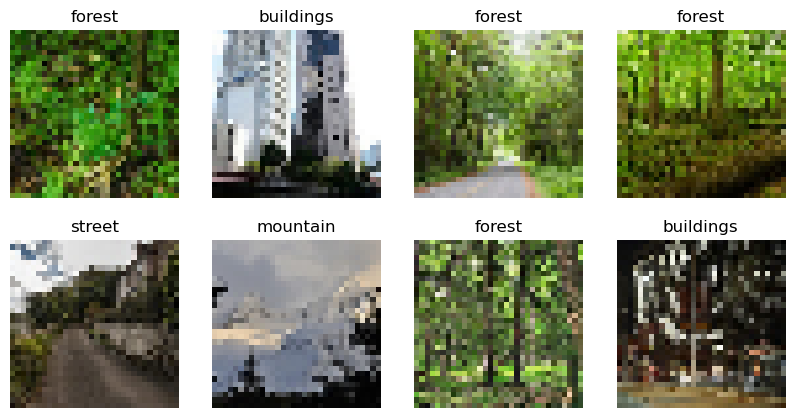

In [19]:
# Seleccionar 8 imágenes aleatorias
fig, axes = plt.subplots(2, 4, figsize=(10, 5))  # 2 filas, 4 columnas
indices = random.sample(range(X_train.shape[0]), 8)  # Seleccionar 8 índices aleatorios

for i, ax in enumerate(axes.flat):
    img = X_train[indices[i]]
    etiqueta = y_train[indices[i]]  # Obtener la etiqueta correspondiente
    ax.imshow(img)
    ax.set_title(etiqueta)
    ax.axis("off")

plt.show()

In [21]:
# convertir las etiquetas a One-Hot Encoding

In [23]:
# Inicializar el codificador One-Hot
encoder = OneHotEncoder(sparse_output=False)

# Transformar las etiquetas a formato One-Hot
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Verificar la nueva forma de las etiquetas
print(f"Forma de y_train después del encoding: {y_train_encoded.shape}")
print(f"Forma de y_test después del encoding: {y_test_encoded.shape}")

# Mostrar un ejemplo de etiqueta transformada
print("\nEjemplo de una etiqueta en One-Hot Encoding:")
print(y_train_encoded[0])  # Mostrar la primera etiqueta codificada

Forma de y_train después del encoding: (14034, 6)
Forma de y_test después del encoding: (3000, 6)

Ejemplo de una etiqueta en One-Hot Encoding:
[0. 1. 0. 0. 0. 0.]


In [ ]:
# Definir la arquitectura de la red neuronal Fully Connected

In [25]:
# Definir la arquitectura de la red neuronal
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Aplanamos la imagen de 32x32x3 a 1D

    # Primera capa oculta
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),  # Regularización para evitar sobreajuste

    # Segunda capa oculta
    layers.Dense(256, activation='relu'),
    
    # Tercera capa oculta
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Cuarta capa oculta
    layers.Dense(64, activation='relu'),
    
    # Quinta capa oculta
    layers.Dense(32, activation='relu'),

    # Capa de salida (6 neuronas para las 6 clases, activación softmax)
    layers.Dense(6, activation='softmax')
])

# Mostrar el resumen de la arquitectura
model.summary()

C:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,134 (6.67 MB)

 Trainable params: 1,748,134 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compilar el modelo

In [29]:
# Compilar el modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Entrenar el modelo

In [33]:
# Entrenar la red neuronal
history = model.fit(X_train, y_train_encoded, 
                    validation_data=(X_test, y_test_encoded),
                    epochs=20, 
                    batch_size=64)

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3023 - loss: 1.6674 - val_accuracy: 0.4623 - val_loss: 1.3434
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4767 - loss: 1.3284 - val_accuracy: 0.5050 - val_loss: 1.2906
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5148 - loss: 1.2523 - val_accuracy: 0.5243 - val_loss: 1.2255
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5217 - loss: 1.2310 - val_accuracy: 0.5420 - val_loss: 1.1975
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5360 - loss: 1.1949 - val_accuracy: 0.5410 - val_loss: 1.1848
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5442 - loss: 1.1759 - val_accuracy: 0.5427 - val_loss: 1.1651
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5672 - loss: 1.1320 - val_accuracy: 0.5547 - val_loss: 1.1766
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5615 - loss: 1.1439 - val_accu

In [35]:
# Evaluación del modelo con métricas

In [37]:
# Evaluar en el conjunto de test
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\n📌 Precisión en test: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.5817 - loss: 1.1213

📌 Precisión en test: 0.5817


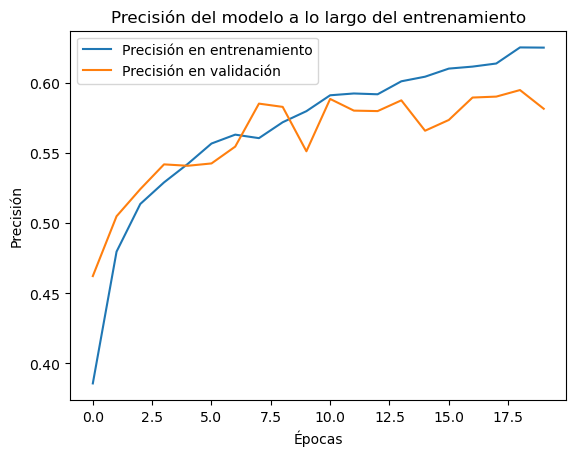

In [39]:
# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title("Precisión del modelo a lo largo del entrenamiento")
plt.show()

In [41]:
# Definir la arquitectura de la CNN

In [43]:
# Definir la arquitectura de la CNN
cnn_model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Capa Flatten para convertir a 1D
    layers.Flatten(),

    # Primera capa densa
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),

    # Segunda capa densa
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Capa de salida con 6 neuronas para las 6 clases
    layers.Dense(6, activation='softmax')
])

# Mostrar el resumen de la arquitectura
cnn_model.summary()

C:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,350 (9.92 MB)

 Trainable params: 2,601,350 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compilar el modelo

In [47]:
# Compilar la CNN
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [49]:
# Entrenar la red neuronal

In [51]:
# Entrenar la CNN
history_cnn = cnn_model.fit(X_train, y_train_encoded, 
                            validation_data=(X_test, y_test_encoded),
                            epochs=25, 
                            batch_size=64)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.4479 - loss: 1.3363 - val_accuracy: 0.6153 - val_loss: 1.0053
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.6756 - loss: 0.8661 - val_accuracy: 0.7480 - val_loss: 0.6955
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.7525 - loss: 0.6835 - val_accuracy: 0.7293 - val_loss: 0.7502
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.7905 - loss: 0.5913 - val_accuracy: 0.7760 - val_loss: 0.6268
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.8149 - loss: 0.5220 - val_accuracy: 0.7927 - val_loss: 0.6111
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.8449 - loss: 0.4467 - val_accuracy: 0.7817 - val_loss: 0.6033
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.8659 - loss: 0.3925 - val_accuracy: 0.8097 - val_loss: 0.5521
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8854 - loss: 0.

In [53]:
 # Evaluación del modelo

In [56]:
# Evaluar el modelo en el conjunto de test
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\n Precisión en test: {test_acc:.4f}")

94/94 - 1s - 14ms/step - accuracy: 0.7917 - loss: 1.1296

📌 Precisión en test: 0.7917


In [58]:
# Visualizar la Curva de Pérdida y Precisión

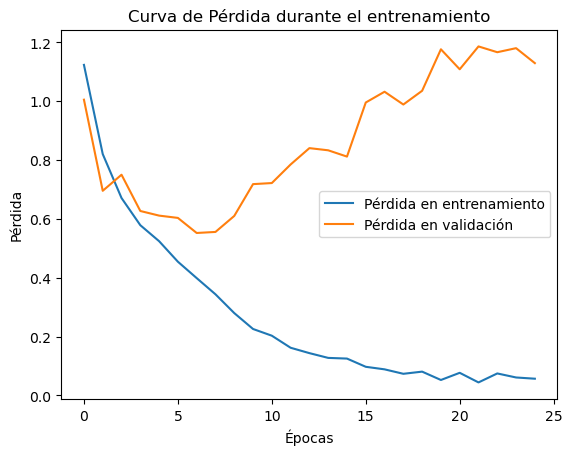

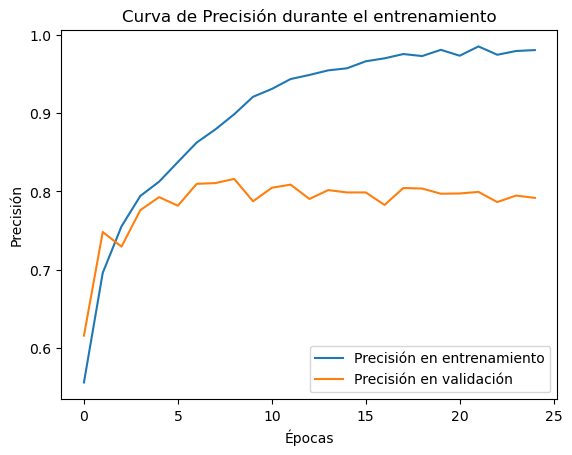

In [60]:

# Graficar la pérdida
plt.plot(history_cnn.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title("Curva de Pérdida durante el entrenamiento")
plt.show()

# Graficar la precisión
plt.plot(history_cnn.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title("Curva de Precisión durante el entrenamiento")
plt.show()

In [62]:
# Definir la Nueva Arquitectura de la CNN

In [64]:

# Definir la arquitectura de la CNN con 16 capas
cnn_model_v2 = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Cuarta capa convolucional
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Aplanamos la salida convolucional
    layers.Flatten(),

    # Primera capa densa
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    
    # Segunda capa densa
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),

    # Tercera capa densa
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Capa de salida con 6 neuronas (softmax para clasificación multiclase)
    layers.Dense(6, activation='softmax')
])

# Mostrar la arquitectura
cnn_model_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             

 Total params: 7,445,062 (28.40 MB)

 Trainable params: 7,443,142 (28.39 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [66]:
# Compilar el modelo

In [69]:
# Compilar la CNN mejorada
cnn_model_v2.compile(optimizer=optimizers.Adam(learning_rate=0.0005),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [71]:
# Entrenar la nueva CNN

In [74]:
# Entrenar la nueva CNN
history_cnn_v2 = cnn_model_v2.fit(X_train, y_train_encoded, 
                                  validation_data=(X_test, y_test_encoded),
                                  epochs=25, 
                                  batch_size=64)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 163s 704ms/step - accuracy: 0.4861 - loss: 1.3892 - val_accuracy: 0.1700 - val_loss: 4.1841
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 136s 620ms/step - accuracy: 0.7259 - loss: 0.7930 - val_accuracy: 0.3427 - val_loss: 1.7506
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 136s 619ms/step - accuracy: 0.7810 - loss: 0.6500 - val_accuracy: 0.7533 - val_loss: 0.7094
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 148s 674ms/step - accuracy: 0.8122 - loss: 0.5678 - val_accuracy: 0.6690 - val_loss: 0.8995
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 140s 636ms/step - accuracy: 0.8215 - loss: 0.5334 - val_accuracy: 0.6737 - val_loss: 0.9306
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 161s 733ms/step - accuracy: 0.8288 - loss: 0.4956 - val_accuracy: 0.7530 - val_loss: 0.7241
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 180s 821ms/step - accuracy: 0.8571 - loss: 0.4261 - val_accuracy: 0.8127 - val_loss: 0.5122
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 180s 817ms/step - accuracy: 0.8679 -

In [ ]:
#  Identificar la clase con más errores

In [76]:

# Obtener predicciones en el conjunto de test
y_pred_test = cnn_model_v2.predict(X_test)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)  # Convertir a etiquetas numéricas
y_true_labels = np.argmax(y_test_encoded, axis=1)  # Convertir y_test a etiquetas numéricas

# Contar los errores por clase
errores = y_true_labels != y_pred_test_labels  # Matriz booleana de errores
errores_por_clase = Counter(y_true_labels[errores])  # Contar errores por etiqueta verdadera

# Obtener la clase con más errores
clase_mas_errores = max(errores_por_clase, key=errores_por_clase.get)
print(f"\n📌 Clase con más errores: {clase_mas_errores} ({errores_por_clase[clase_mas_errores]} errores)")

# Mapear el índice numérico a la categoría
clases = ["Buildings", "Forest", "Glacier", "Mountain", "Sea", "Street"]
print(f"La clase con más errores es: {clases[clase_mas_errores]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step

📌 Clase con más errores: 2 (187 errores)
La clase con más errores es: Glacier


In [78]:
#  Mostrar 8 imágenes mal clasificadas

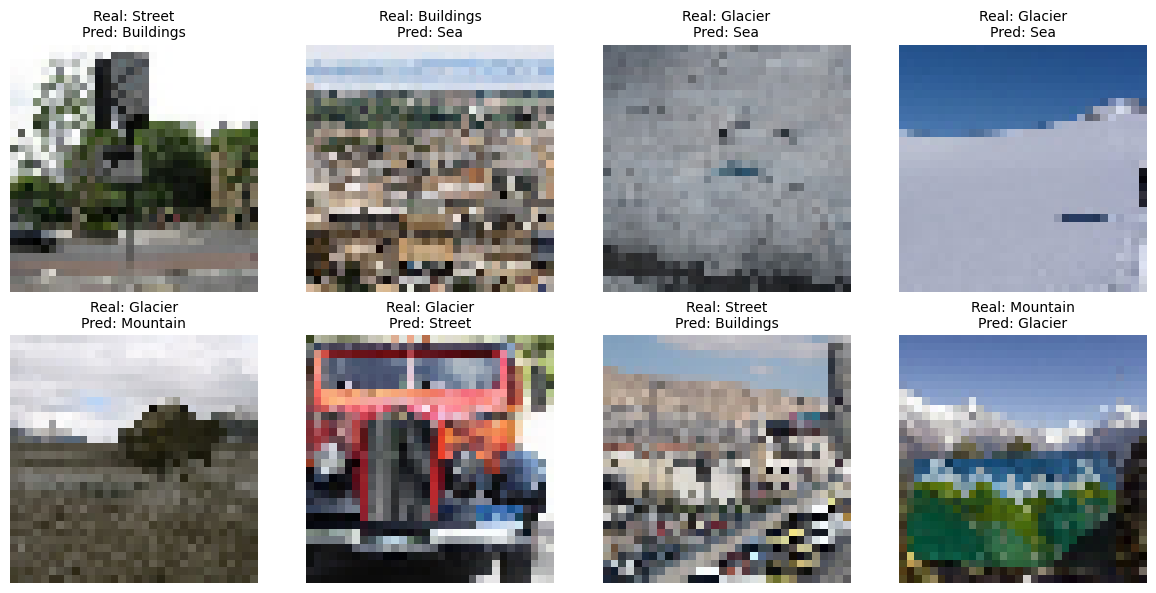

In [80]:
# Filtrar los índices donde hubo error
indices_errores = np.where(y_true_labels != y_pred_test_labels)[0]

# Seleccionar 8 imágenes mal clasificadas de forma aleatoria
indices_muestra = np.random.choice(indices_errores, 8, replace=False)

# Mostrar las imágenes con la etiqueta predicha
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = X_test[indices_muestra[i]]
    etiqueta_real = clases[y_true_labels[indices_muestra[i]]]
    etiqueta_predicha = clases[y_pred_test_labels[indices_muestra[i]]]

    ax.imshow(img)
    ax.set_title(f"Real: {etiqueta_real}\nPred: {etiqueta_predicha}", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()